# Analysing the editions of *les fleurs du mal de baudelaire* from data.bnf.fr

The Bibliothèque nationale de France published [data.bnf.fr](data.bnf.fr) its resources by aggregating information scattered among its various catalogues and the Gallica digital library on dedicated HTML pages. [Data.bnf.fr](data.bnf.fr) is an open data project based on semantic web standards and tools.

This notebook shows how to exploit the editions of *les fleurs du mal de baudelaire* using different techniques. It also provides a CSV file as a dataset extracted from the SPARQL endpoint.

## Settings up things

In [1]:
import os
import requests
import json
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the data

In [34]:
url = 'https://data.bnf.fr/sparql'
query = """
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX rdarelationships: <http://rdvocab.info/RDARelationshipsWEMI/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX rdagroup2elements: <http://rdvocab.info/ElementsGr2/>
SELECT DISTINCT ?edition ?titre ?date ?editeur ?contributor ?contributor_name ?activity ?placeOfBirth
WHERE {
  <http://data.bnf.fr/ark:/12148/cb11947965f> foaf:focus ?Oeuvre .
  ?edition rdarelationships:workManifested ?Oeuvre. 
  OPTIONAL{
    ?edition dcterms:date ?date
  }OPTIONAL{
    ?edition dcterms:title ?titre
  }OPTIONAL{
    ?edition dcterms:publisher ?editeur
  }OPTIONAL{
    ?edition rdarelationships:expressionManifested ?exp.
    ?exp dcterms:contributor ?contributor.
    ?contributor foaf:name ?contributor_name . 
    ?contributor rdagroup2elements:fieldOfActivityOfThePerson ?activity .
    FILTER (!regex(str(?activity), "dewey", "i")) .
    ?contributor rdagroup2elements:placeOfBirth ?placeOfBirth
  }
  
}
"""
#r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query})
r = requests.get(url, params = {'format': 'text/csv', 'query': query})
print(r.text)
print('results retrieved!')

"edition","titre","date","editeur","contributor","contributor_name","activity","placeOfBirth"
"http://data.bnf.fr/ark:/12148/cb34591152d#about","Les Fleurs du mal","1977","[Paris] : Librairie générale française , 1977","http://data.bnf.fr/ark:/12148/cb118905823#about","Charles Baudelaire","Littératures","Paris"
"http://data.bnf.fr/ark:/12148/cb34718779g#about","Les Fleurs du mal","1983","Paris : France loisirs , 1983","http://data.bnf.fr/ark:/12148/cb118905823#about","Charles Baudelaire","Littératures","Paris"
"http://data.bnf.fr/ark:/12148/cb35555341k#about","Les fleurs du mal","1992","[Paris] : le Grand livre du mois , 1992","http://data.bnf.fr/ark:/12148/cb118905823#about","Charles Baudelaire","Littératures","Paris"
"http://data.bnf.fr/ark:/12148/cb35574416t#about","Les fleurs du mal","1926","Paris : Payot , 1926","http://data.bnf.fr/ark:/12148/cb118905823#about","Charles Baudelaire","Littératures","Paris"
"http://data.bnf.fr/ark:/12148/cb35574416t#about","Les fleurs du mal","1926",

## Save CSV file

In [35]:
# save the result
f = open("bnf-records.csv", "w")
f.write(r.text)
f.close()

## Read the results

In [36]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('bnf-records.csv')

In [37]:
df

,edition,titre,date,editeur,contributor,contributor_name,activity,placeOfBirth
0,http://data.bnf.fr/ark:/12148/cb34591152d#about,Les Fleurs du mal,1977,"[Paris] : Librairie générale française , 1977",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
1,http://data.bnf.fr/ark:/12148/cb34718779g#about,Les Fleurs du mal,1983,"Paris : France loisirs , 1983",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
2,http://data.bnf.fr/ark:/12148/cb35555341k#about,Les fleurs du mal,1992,"[Paris] : le Grand livre du mois , 1992",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
3,http://data.bnf.fr/ark:/12148/cb35574416t#about,Les fleurs du mal,1926,"Paris : Payot , 1926",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
4,http://data.bnf.fr/ark:/12148/cb35574416t#about,Les fleurs du mal,1926,"Paris : Payot , 1926",http://data.bnf.fr/ark:/12148/cb119274707#about,Paul Valéry,Arts graphiques,Sète (Hérault)
5,http://data.bnf.fr/ark:/12148/cb35574416t#about,Les fleurs du mal,1926,"Paris : Payot , 1926",http://data.bnf.fr/ark:/12148/cb119274707#about,Paul Valéry,Littératures,Sète (Hérault)
6,http://data.bnf.fr/ark:/12148/cb35574416t#about,Les fleurs du mal,1926,"Paris : Payot , 1926",http://data.bnf.fr/ark:/12148/cb119274707#about,Paul Valéry,Dessin. Arts décoratifs,Sète (Hérault)
7,http://data.bnf.fr/ark:/12148/cb355743841#about,Les fleurs du mal,1993,"Paris : Booking international , 1993",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
8,http://data.bnf.fr/ark:/12148/cb33870106z#about,Charles Baudelaire. Les Fleurs du mal. Petits ...,1925,"(London) : The Casanova society , 1925",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
9,http://data.bnf.fr/ark:/12148/cb34565044v#about,Les Fleurs du mal : [et autres poèmes],1974,"[Paris] : [Grasset et Fasquelle] , 1974",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris


## Let's explore the data

In [43]:
df.count()

edition             410
titre               399
date                397
editeur             396
contributor         373
contributor_name    373
activity            373
placeOfBirth        373
dtype: int64

## Let's identify the core activities of the contributors

The core activity is *Littératures* with 313 rows 

In [48]:
df.groupby('contributor_name')['activity'].value_counts()

contributor_name       activity               
André Gide             Littératures                 2
André Suarès           Littératures                 1
Arnaud d' Hauterives   Peinture                     1
Auguste Rodin          Dessin. Arts décoratifs      2
                       Sculpture                    2
Blaise Cendrars        Littératures                 1
Camille Mauclair       Littératures                 2
Camille Vergniol       Éducation                    2
Charles Baudelaire     Littératures               313
Claude Serre           Arts graphiques              1
                       Dessin. Arts décoratifs      1
Edgar Chahine          Arts graphiques              1
                       Peinture                     1
Gesualdo Bufalino      Littératures                 1
Gilbert Lely           Littératures                 1
Henri Cartier-Bresson  Photographie                 1
Henri Matisse          Art                          6
Jacques Reynaud        Littératures

## We can create a network graph to represent these relationships

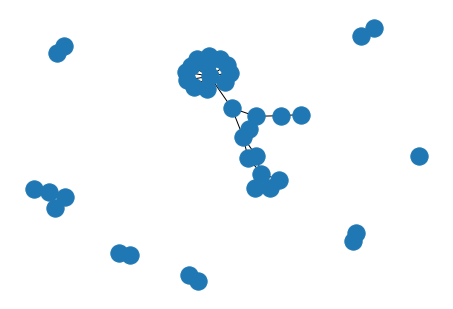

In [49]:
# Build your graph
G = nx.from_pandas_edgelist(df, 'contributor_name', 'activity')

nx.draw(G, scale=3, with_labels=False)  
plt.show()

## Let's explore the birth place

In [51]:
df.groupby('contributor_name')['placeOfBirth'].value_counts()

contributor_name       placeOfBirth                         
André Gide             Paris                                      2
André Suarès           Marseille                                  1
Arnaud d' Hauterives   Braine (Aisne)                             1
Auguste Rodin          Paris                                      4
Blaise Cendrars        La Chaux-de-Fonds (Suisse)                 1
Camille Mauclair       Paris, 5e arrondissement (France)          2
Camille Vergniol       Libourne (Gironde)                         2
Charles Baudelaire     Paris                                    313
Claude Serre           Sucy-en-Brie (Val-de-Marne)                2
Edgar Chahine          Vienne (Autriche)                          2
Gesualdo Bufalino      Comiso, Italie                             1
Gilbert Lely           Neuilly-sur-Seine                          1
Henri Cartier-Bresson  Chanteloup (Seine-et-Marne)                1
Henri Matisse          Cateau-Cambrésis (Nord)         

## Let's now create a network graph based on the place of birth

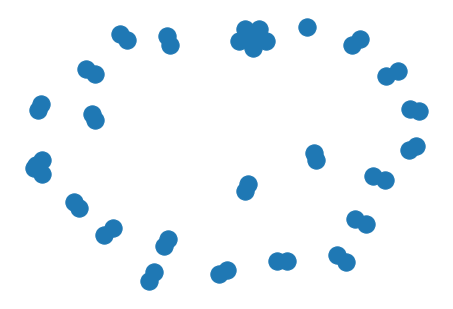

In [55]:
# Build your graph
G = nx.from_pandas_edgelist(df, 'contributor_name', 'placeOfBirth')

nx.draw(G, with_labels=False)  
plt.show()

## Reducing the data by year

We can filter the data by year

In [60]:
df[(df.date == '1923')]

,edition,titre,date,editeur,contributor,contributor_name,activity,placeOfBirth
13,http://data.bnf.fr/ark:/12148/cb31758652k#about,Charles Baudelaire. Les Fleurs du Mal. Texte d...,1923,"Tours, impr. Deslis père, R. et P. Deslis ; Pa...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
42,http://data.bnf.fr/ark:/12148/cb31773881x#about,Les fleurs du mal,1923,"Paris : Cercle Grolier , 1923",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
43,http://data.bnf.fr/ark:/12148/cb31773881x#about,Les fleurs du mal,1923,"Paris : Cercle Grolier , 1923",http://data.bnf.fr/ark:/12148/cb11915191p#about,Camille Mauclair,Littératures,"Paris, 5e arrondissement (France)"
68,http://data.bnf.fr/ark:/12148/cb317738739#about,"Les Fleurs du Mal : édition intégrale, revue s...",1923,"Paris : Garnier frères, libr.-éditeurs , 1921 ...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
87,http://data.bnf.fr/ark:/12148/cb31773883m#about,Ch. Baudelaire. Les Fleurs du mal,1923,"Paris : impr. et libr. Alphonse Lemerre , 1923",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
92,http://data.bnf.fr/ark:/12148/cb31773880k#about,Charles Baudelaire. Les Fleurs du Mal. Texte d...,1923,"Tours, impr. Deslis père, R. et P. Deslis ; Pa...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
131,http://data.bnf.fr/ark:/12148/cb317738781#about,Charles Baudelaire. Les Fleurs du mal,1923,"Paris, G. Boutitie (impr. de G. Boutitie) , 19...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris
162,http://data.bnf.fr/ark:/12148/cb31773879c#about,Les Fleurs du mal,1923,"Paris, Emile-Paul frères (impr. de Frazier-Soy...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire,Littératures,Paris


### Create graph

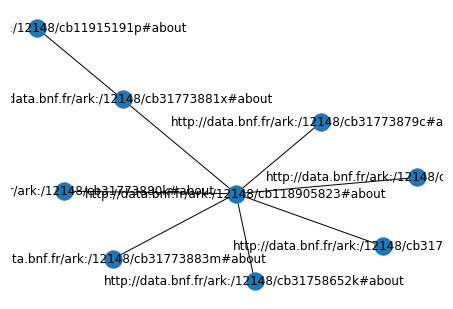

In [61]:
# Build your graph
G = nx.from_pandas_edgelist(df[(df.date == '1923')], 'edition', 'contributor')

# Plot it
#nx.draw(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.show()